# 9 Experiments

/tmp/ipykernel_769099/741629654.py:65: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  MLP_dfs  = [pd.read_csv(exp['path'], index_col='timestamp', parse_dates=True,
/tmp/ipykernel_769099/741629654.py:65: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  MLP_dfs  = [pd.read_csv(exp['path'], index_col='timestamp', parse_dates=True,
/tmp/ipykernel_769099/741629654.py:65: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  MLP_dfs  = [pd.read_csv(exp['path'], index_col='timestamp', parse_dates=True,
/tmp/ipykernel_769099/741629654.py:65: FutureW

/tmp/ipykernel_769099/741629654.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.boxplot(y=df_plot['Label'], x=xvals, ax=ax[i],
/tmp/ipykernel_769099/741629654.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(['Test Abnormal','Test Normal'], fontsize=9, rotation=0)
/tmp/ipykernel_769099/741629654.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.boxplot(y=df_plot['Label'], x=xvals, ax=ax[i],
/tmp/ipykernel_769099/741629654.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(['Test Abnormal','Test Normal'], fontsize=9, rotation=0)
/tmp/ipykernel_769099/741629654.py:116: FutureWa

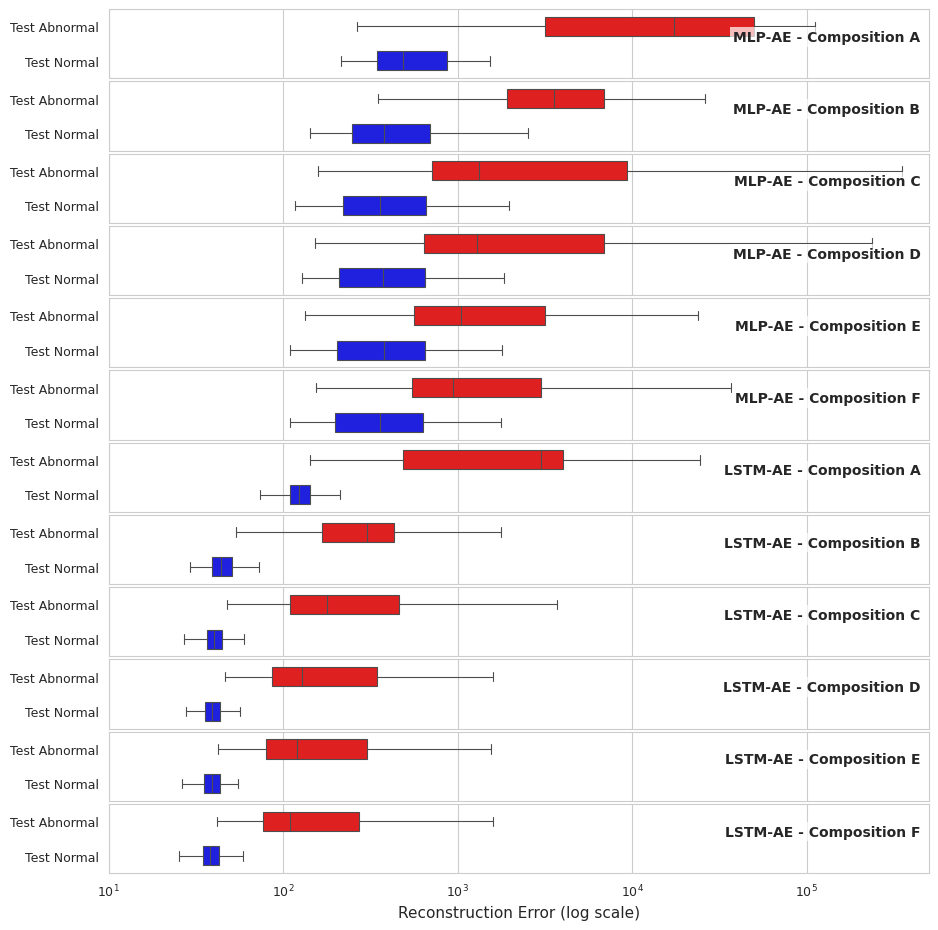

Saved: boxplot_1col_12rows.pdf and boxplot_1col_12rows.png


In [ ]:
# %reset -f
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# ----------------------------
# Helpers
# ----------------------------
def add_label_grey_grey_train(df, grey_data_range_train_threshold, verbose=False):
    grey_index = df.query(
        '@grey_data_range_train_threshold[0] <= sum_flags <= @grey_data_range_train_threshold[1]'
    ).index
    grey_train_index = df.query(
        '@grey_data_range_train_threshold[0] <= sum_flags <= @grey_data_range_train_threshold[2]'
    ).index
    df.loc[grey_index, 'Label'] = 'grey'
    df.loc[grey_train_index, 'Label'] = 'grey_train'

from matplotlib.ticker import LogLocator, NullFormatter, NullLocator

def prettify_log_x(ax):
    ax.set_xscale('log')
    # major ticks at powers of 10
    ax.xaxis.set_major_locator(LogLocator(base=10, numticks=12))
    # no minor ticks at all (removes the small grid lines)
    ax.xaxis.set_minor_locator(NullLocator())
    ax.xaxis.set_minor_formatter(NullFormatter())
    # grid only for major ticks
    ax.xaxis.grid(True, which='major', alpha=0.25)
    ax.xaxis.grid(False, which='minor')



# ----------------------------
# Input files
# ----------------------------
MLP_Exp1 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/MLP-AE/AE_Results-f0/inference_results.csv'}
MLP_Exp2 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/MLP-AE/AE_Results-f5/inference_results.csv'}
MLP_Exp3 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/MLP-AE/AE_Results-f10/inference_results.csv'}
MLP_Exp4 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/MLP-AE/AE_Results-f15/inference_results.csv'}
MLP_Exp5 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/MLP-AE/AE_Results-f20/inference_results.csv'}
MLP_Exp6 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/MLP-AE/AE_Results-f25/inference_results.csv'}

LSTM_Exp1 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-3_Train_2021-04-08-23-30_to_2021-05-21-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f00/Inference_Results.csv',
             'grey_data_range_train_threshold':[1,25,0] }
LSTM_Exp2 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-3_Train_2021-04-08-23-30_to_2021-05-21-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f05/Inference_Results.csv',
             'grey_data_range_train_threshold':[1,25,5] }
LSTM_Exp3 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-3_Train_2021-04-08-23-30_to_2021-05-21-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Inference_Results.csv',
             'grey_data_range_train_threshold':[1,25,10]}
LSTM_Exp4 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-3_Train_2021-04-08-23-30_to_2021-05-21-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f15/Inference_Results.csv',
             'grey_data_range_train_threshold':[1,25,15]}
LSTM_Exp5 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-3_Train_2021-04-08-23-30_to_2021-05-21-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f20/Inference_Results.csv',
             'grey_data_range_train_threshold':[1,25,20]}
LSTM_Exp6 = {'path':'/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-3_Train_2021-04-08-23-30_to_2021-05-21-23-50/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f25/Inference_Results.csv',
             'grey_data_range_train_threshold':[1,25,25]}

MLP_Exp_list  = [MLP_Exp1, MLP_Exp2, MLP_Exp3, MLP_Exp4, MLP_Exp5, MLP_Exp6]
LSTM_Exp_list = [LSTM_Exp1, LSTM_Exp2, LSTM_Exp3, LSTM_Exp4, LSTM_Exp5, LSTM_Exp6]

# ----------------------------
# Load data
# ----------------------------
MLP_dfs  = [pd.read_csv(exp['path'], index_col='timestamp', parse_dates=True,
                        date_parser=pd.to_datetime).drop('Unnamed: 0', axis=1)
            for exp in MLP_Exp_list]
LSTM_dfs = [pd.read_csv(exp['path'], index_col='timestamp', parse_dates=True,
                        date_parser=pd.to_datetime)
            for exp in LSTM_Exp_list]

# Optional grey labels for LSTM; we'll filter them out anyway
for idx, df in enumerate(LSTM_dfs):
    add_label_grey_grey_train(df, LSTM_Exp_list[idx]['grey_data_range_train_threshold'])
    df.loc[df['Label'].eq('grey_train'), 'Label'] = 'train'  # harmless; we'll filter

# ----------------------------
# Compute shared log-x limits (only abnormal/test) + trim extremes
# ----------------------------
CLASSES   = ['abnormal', 'test']   # show only these (no 'train')
TRIM_PCT  = (0.5, 99.8)            # percentile cap to avoid big empty right side

mlp_all = np.concatenate([
    df.loc[df['Label'].isin(CLASSES), 'Error'].to_numpy() 
    for df in MLP_dfs
])
lstm_all = np.concatenate([
    df.loc[df['Label'].isin(CLASSES), 'Error'].to_numpy()
    for df in LSTM_dfs
])

all_errors = np.concatenate([mlp_all, lstm_all])
all_errors = all_errors[np.isfinite(all_errors) & (all_errors > 0)]

lo, hi = np.percentile(all_errors, TRIM_PCT)
xmin = 10 ** np.floor(np.log10(max(lo, np.finfo(float).tiny)))
xmax = 10 ** np.ceil (np.log10(hi))

# ----------------------------
# Plot: 1 column, 12 rows
# ----------------------------
sns.set_style("whitegrid")
fig, ax = plt.subplots(12, 1, figsize=(10, 0.8*12), sharex=True)
plt.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.08, hspace=0.045)

kwargs_common = dict(
    orient='h', showfliers=False, width=0.55, linewidth=0.8,
    palette=['red', 'blue']
)

for i, df in enumerate(MLP_dfs):
    df_plot = df[df['Label'].isin(CLASSES)]
    p = sns.boxplot(y=df_plot['Label'], x=xvals, ax=ax[i],
                    order=CLASSES, **kwargs_common)
    p.set(ylabel=None)
    ax[i].set_xscale('log'); ax[i].set_xlim(xmin, 500_000)
    ax[i].tick_params(axis='x', labelsize=9)
    ax[i].set_yticklabels(['Test Abnormal','Test Normal'], fontsize=9, rotation=0)
    ax[i].text(0.99, 0.70, f"MLP-AE - Composition {chr(ord('A')+i)}",
               transform=ax[i].transAxes, fontsize=10, weight='bold',
               ha='right', va='top',
               bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=2))
    

for j, df in enumerate(LSTM_dfs, start=6):
    df_plot = df[df['Label'].isin(CLASSES)]
    xvals = df_plot['Error'].to_numpy()
    p = sns.boxplot(y=df_plot['Label'], x=xvals, ax=ax[j],
                    order=CLASSES, **kwargs_common)
    p.set(ylabel=None)
    ax[j].set_xscale('log'); ax[j].set_xlim(xmin, 500_000)
    ax[j].tick_params(axis='x', labelsize=9)
    ax[j].set_yticklabels(['Test Abnormal','Test Normal'], fontsize=9, rotation=0)
    ax[j].text(0.99, 0.70, f"LSTM-AE - Composition {chr(ord('A')+(j-6))}",
               transform=ax[j].transAxes, fontsize=10, weight='bold',
               ha='right', va='top',
               bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=2))

# Shared x-label
ax[-1].set_xlabel('Reconstruction Error (log scale)', fontsize=11)

# ----------------------------
# Save tight, publication quality
# ----------------------------
out_pdf = 'boxplot_1col_12rows.pdf'
out_png = 'boxplot_1col_12rows.png'

fig.savefig(out_pdf, bbox_inches='tight', pad_inches=0.01)           # vector PDF
fig.savefig(out_png, bbox_inches='tight', pad_inches=0.01, dpi=600)  # high-DPI PNG

plt.show()
print(f"Saved: {out_pdf} and {out_png}")
